<a href="https://colab.research.google.com/github/fentresspaul61B/Smiley_Predictor_CNN/blob/master/image_pixel_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Drawn Smiley Face Prediction with Convolutional Neural Network (Tensor Flow), and Image Reconstruction with Normalizing Flow Model (Pytorch)

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
show = plt.imshow(image)
plt.show() 

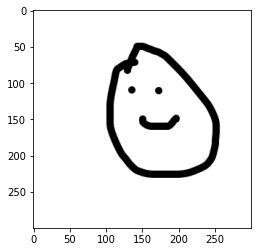

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import cv2 
import pandas as pd
import numpy as np


path = "/content/drive/MyDrive/img_1.png"
image = img.imread(path)
show = plt.imshow(image)
plt.show() 

In [ ]:
image.shape

(300, 300, 3)

# Reduce Dimensions from 300x300 to 28x28
First I reduce the image to a 2 dimension shape. 

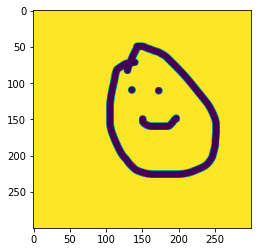

In [ ]:
new_image = image[:,:, 0]
show = plt.imshow(new_image)
plt.show() 

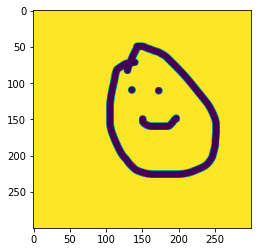

In [ ]:
show = plt.imshow(new_image)
plt.show() 

In [ ]:
new_image.shape

(300, 300)

# Now slice out the rows and columns

In [ ]:
import pandas as pd
import numpy as np


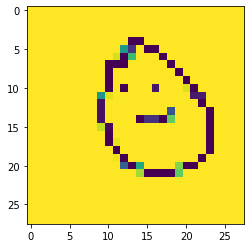

In [ ]:
IMG_SIZE = 28
reduced_img = cv2.resize(new_image, (IMG_SIZE, IMG_SIZE))
show = plt.imshow(reduced_img)
plt.show() 

In [ ]:
# df = pd.DataFrame(new_image)
# df = df.groupby(np.arange(len(df))//10).mean()
# df = df.T
# df = df.groupby(np.arange(len(df))//10).mean()
# df = df.T 
# reduced_img = df.values[1:-1, 1:-1] 

In [ ]:
# show = plt.imshow(reduced_img)
# plt.show() 

# Now we have our image in the ideal shape

In [ ]:
reduced_img.shape

(28, 28)

# Image Reduction Function

In [ ]:
def image_reducer(path, size=IMG_SIZE):
  """
  Inputs: 

  - path 
  path is a file path from anywhere, ideally google drive
  of the image to be reduced

  - size 
  dimension of square image to be reduced into


  Outputs: 
  reduced image of data type np.array
  """
  # Reading in the image from path
  image = img.imread(path)

  # Reducing from 3d to 2d shape
  image = image[:,:, 0]

  # Resizeing Image
  reduced_img = cv2.resize(image, (size, size))

  return reduced_img
  

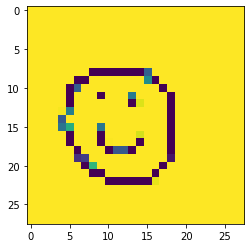

In [ ]:
path = "/content/drive/MyDrive/smiley_data/Happy/Happy__1434469600480276454.png"

test_img = image_reducer(path)
show = plt.imshow(test_img)
plt.show() 

# Data Augmentation using Keras

In [ ]:
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import time


In [ ]:
def augment_zoom(path,num_copies=10, shift_factor=2):
  """
  augment_zoom

  INPUTS:
  - string
  path of img file 

  - shift factor
  int (default = 2)
  int 1 - 10 that increases the zoom factor 

  - num_copies
  int (default = 10)
  number of copies created

  OUTPUT:
  10 images that are randomly zoomed in and out
  """
  # This method creates 10 duplicates that scale in
  # amount of zoom.
  num = 0
  shifted_files = []
  for i in range(1,num_copies+1):
      resize = shift_factor / 10
      data_augmentation = keras.Sequential([
          layers.experimental.preprocessing.RandomZoom(resize)
          ])
      img_in = image_reducer(path)
      img_in = img_in.reshape((img_in.shape[0],img_in.shape[0],-1))
      shifted_data = data_augmentation(img_in).numpy()
      # shifted_file = Image_File(shifted_data,self.emotion, self.data_set)
      shifted_data = shifted_data[:,:, 0]
      shifted_files.append(shifted_data)
  return np.array(shifted_files)

# Plotting zoomed images

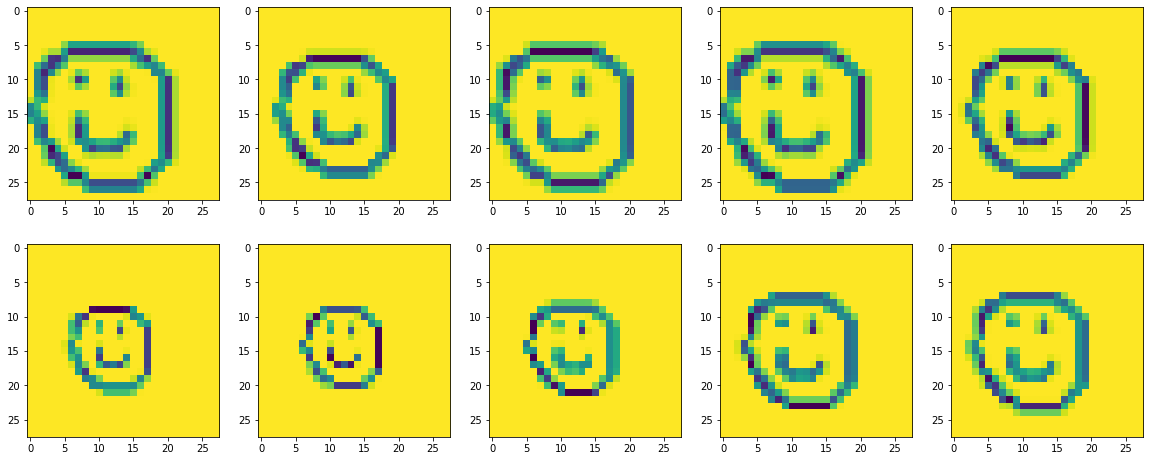

In [ ]:
plt.subplots(nrows=2, ncols=5, figsize=(20, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

imgs = augment_zoom(path, shift_factor=3)

for i in np.arange(1,11):
  plt.subplot(2,5,i)
  # Here I had to reshape the data into 28x28 matrcies in order to
  # show the correct image
  img_plot = imgs[i-1]
  show = plt.imshow(img_plot)
plt.show()

# Augment Shift Vertical and Horizontal

In [ ]:
def augment_shift(path,num_copies=10, vertical=False, vert_range=0.4, horizontal_range = [-3,3]):
  """
  augment_shift
  INPUTS: 
  - path (string)
  file path to an image

  - num_copies (int) default = 10
  how many copies to create

  - vertical (boolean) default = False
  if true: shift vertical
  if false shift horizontal 

  - vert_range (float)
  float to specify how far to shift vertical 

  - horizontal_range (list or tuple) 
  how wide to shift horizontal_range

  OUTPUTS 
  10 shifted images in array form 
  (10, 28, 28) output

  notes:
  to accsess the ith image:
  augment_shift(path)[i]

  """
  # This method is used to shift images horizontal
  # or vertical.
  # The reason I am making these augment methods is to easily
  # generated lots of similar but slightly different images.
  shifted_files = []
  img_in = image_reducer(path)
  dataImage = img_to_array(img_in)
  imageNew = expand_dims(dataImage, 0)
  if vertical:
      imageDataGen = ImageDataGenerator(height_shift_range=vert_range)
  else:
      imageDataGen = ImageDataGenerator(width_shift_range=horizontal_range)
  iterator = imageDataGen.flow(imageNew, batch_size=1)
  for i in range(1,num_copies+1):
      batch = iterator.next()
      image_data = batch[0]
      image_data = image_data[:,:, 0]
      shifted_files.append(image_data)
  return np.array(shifted_files)


# Plotting Shifted Images: Horizontal

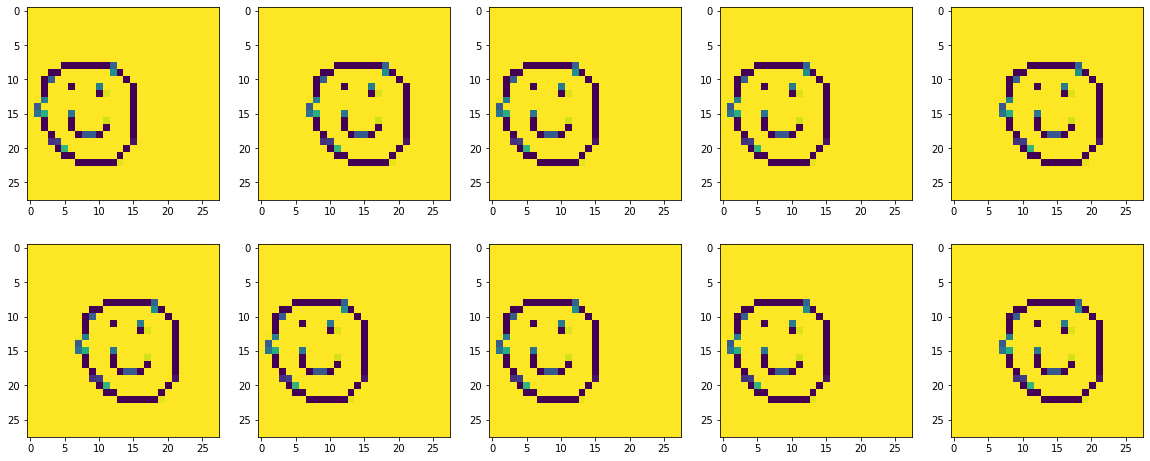

In [ ]:
plt.subplots(nrows=2, ncols=5, figsize=(20, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

imgs = augment_shift(path)

for i in np.arange(1,11):
  plt.subplot(2,5,i)
  # Here I had to reshape the data into 28x28 matrcies in order to
  # show the correct image
  img_plot = imgs[i-1]
  show = plt.imshow(img_plot)
plt.show()

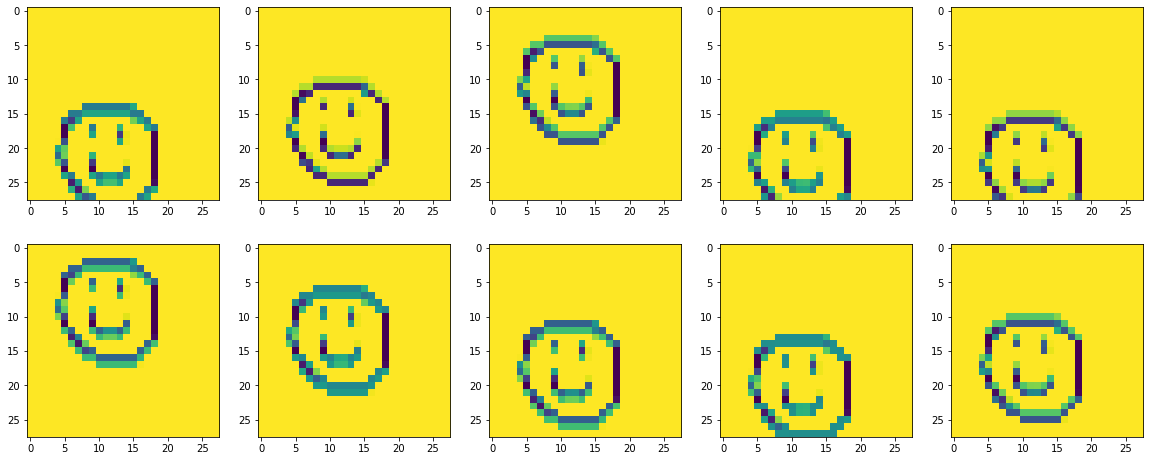

In [ ]:
plt.subplots(nrows=2, ncols=5, figsize=(20, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

imgs = augment_shift(path, vertical=True, vert_range=0.3)

for i in np.arange(1,11):
  plt.subplot(2,5,i)
  # Here I had to reshape the data into 28x28 matrcies in order to
  # show the correct image
  img_plot = imgs[i-1]
  show = plt.imshow(img_plot)
plt.show()

In [ ]:
np.vstack((imgs,imgs)).shape

(20, 28, 28)

In [ ]:
def generate_augmented_data(path):
  shift_1 = augment_shift(path, vertical=True, vert_range=0.2)
  shift_2 = augment_shift(path, vertical=True, vert_range=0.1)
  shift_3 = augment_zoom(path, shift_factor=3)
  shift_4 = augment_zoom(path)
  shift_5 = augment_shift(path)
  stack = np.vstack((shift_1,shift_2, shift_3, shift_4, shift_5))
  return stack

def generate_augmented(path, loops=2):
  L = []
  for i in range(loops):
    L.append(generate_augmented_data(path))
  tup = tuple(L)
  return np.vstack(tup)
    


# generate_augmented(path).shape

# Data Collection
In streamlit I created a canvas to draw and collect image data with. This means drawing 100+ unique smiley / sad faces.

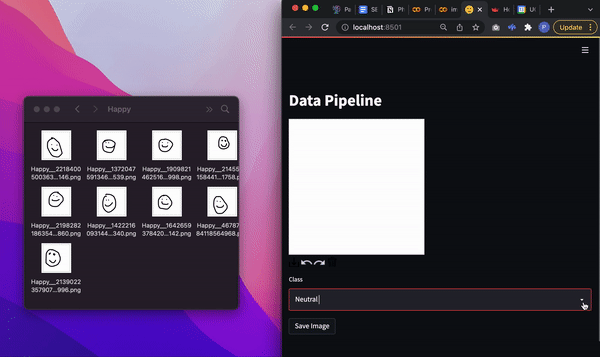

In [ ]:
from IPython.display import Image
path = "/content/drive/MyDrive/ezgif.com-gif-maker.gif"
Image(open(path, 'rb').read())

I initally started with by drawing 50 unique happy faces, and 50 unique sad faces. For 100 total samples, then I  augmented these 100 sampels to get 50,000 samples. 

However, I did not get very good results initially, so I decided to add draw more samples, and also create a larger data set. There are now 400 unique Happy faces and 400 unique sad faces, and I will augment this into a set of 80,000 total samples. 

# Pulling Data From Lists Within Google Drive
I created a folder called "/content/drive/MyDrive/smiley_data" which contains two sub folders "Happy" and "Sad" each with 50 images in each. Below I am iterating through the files using the os package and appending them to a list. The goal was to replicate how the MNIST Digits were stored. 

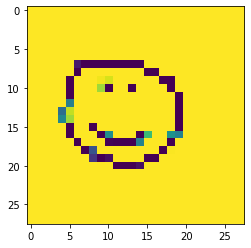

In [ ]:
"""
In this cell first I am defining the folde which contains
the image data. In this case it is: 
"/content/drive/MyDrive/smiley_data/Happy"

Next I append that to a list.

Then we can iterate through the list in order to create the dataset. 
"""


import os

local_download_path = "/content/drive/MyDrive/smiley_data/Happy"

smiley_data = []

for filename in os.listdir(local_download_path):
    if filename.endswith("png"): 
        smiley_data.append(str(local_download_path) +"/"+ str(filename))


path = smiley_data[1]

test_img = image_reducer(path)
show = plt.imshow(test_img)
plt.show() 


# First I am pulling the 400 Happy samples, and augmenting them, to get a dataset of size 40,000

In [ ]:
# WARNING THIS CELL TAKES VERY LONG TO LOAD
# THIS IS UPLOADING AND AUGMENTING 25,000 IMAGES
"""
create_data_set(data)
INPUTS: 
- data (list object)
  a list of file paths to images

OUTPUTS 
500 shifted images in array form 
(10, 28, 28) output for every image 
in the input list "data" 25,000 
total images

notes:
This function loads images, 
downsamples them, aguments them
then stacks them together using 
np.vstack

"""


def create_data_set(data):
  L = []
  for img in data:
    L.append(generate_augmented(img))
  tup = tuple(L)
  return np.vstack(tup)


# Generating Happy Data

In [ ]:
%time
smiley = create_data_set(smiley_data)
smiley.shape

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


(40000, 28, 28)

In [ ]:
happy_labels = np.ones(smiley.shape[0])

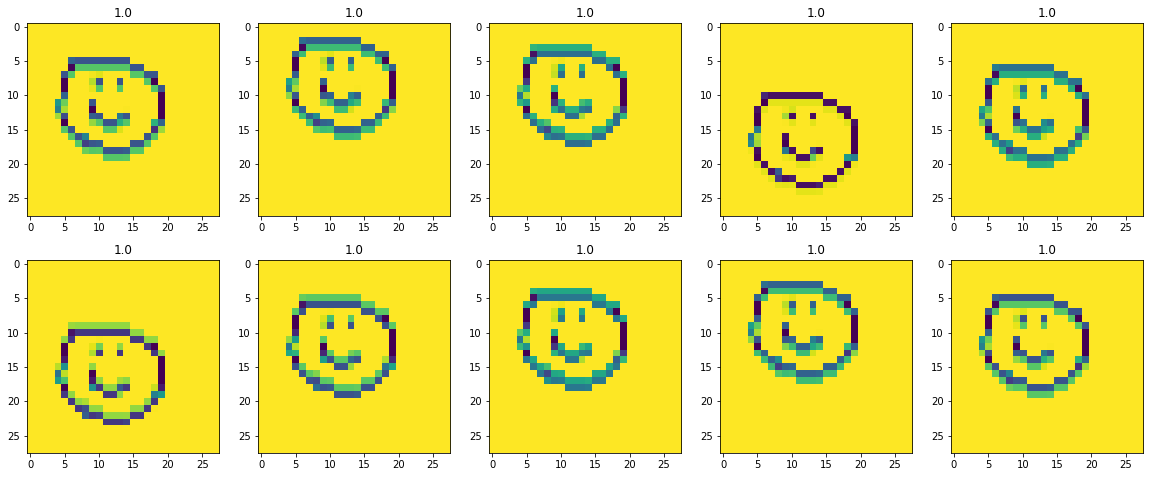

In [ ]:
plt.subplots(nrows=2, ncols=5, figsize=(20, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

imgs = smiley

for i in np.arange(1,11):
  plt.subplot(2,5,i)
  # Here I had to reshape the data into 28x28 matrcies in order to
  # show the correct image
  img_plot = smiley[i-1]
  show = plt.imshow(img_plot)
  plt.title(happy_labels[i-1])
plt.show();

# Here I am creating Labels for Happy Images.
- 1 = Happy
- 0 = Sad

# Generating Sad Data

In [ ]:
local_download_path = "/content/drive/MyDrive/smiley_data/Sad"

sad_data = []

for filename in os.listdir(local_download_path):
    if filename.endswith("png"): 
        sad_data.append(str(local_download_path) +"/"+ str(filename))

In [ ]:
%time
sad = create_data_set(sad_data)
sad.shape

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


(40000, 28, 28)

In [ ]:
sad_labels = np.zeros(sad.shape[0])

# Creating Labels for Sad Data

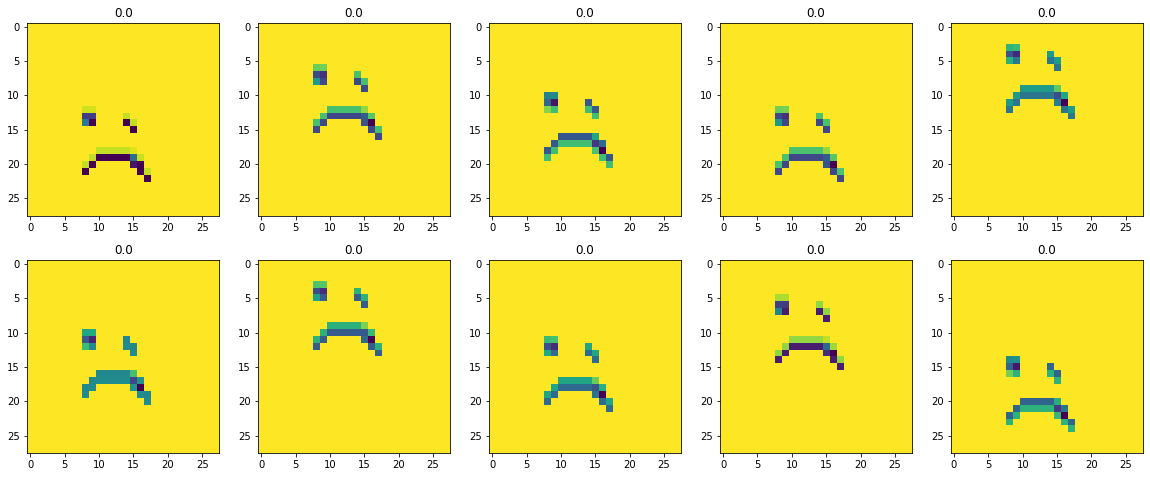

In [ ]:
plt.subplots(nrows=2, ncols=5, figsize=(20, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

imgs = sad

for i in np.arange(1,11):
  plt.subplot(2,5,i)
  # Here I had to reshape the data into 28x28 matrcies in order to
  # show the correct image
  img_plot = imgs[i-1]
  show = plt.imshow(img_plot)
  plt.title(sad_labels[i-1])
plt.show();

# Appending Happy and Sad Data together
Here I am bringing the happy data together with the sad into a single list object, same with the labels

In [ ]:
X = np.vstack((smiley, sad))
Y = np.hstack((happy_labels, sad_labels))
X.shape, Y.shape

((80000, 28, 28), (80000,))

# Flattening the Data and Creating Data Frame

In [ ]:
# img_rows, img_cols = 28, 28 
# num_classes = 2

# # reshape data, depending on Keras backend
# X = X.reshape(X.shape[0], img_rows*img_cols)
# X_ = X_.reshape(X_.shape[0], img_rows*img_cols)

# Use pickle to freeze this data, so there I dont need to reload it each time. 

In [ ]:
import pickle 
"""
This creates our "data_pickled" file with our data and labels inside a tuple
The data is now saved in a .pkl file
"""
with open("data_pickled.pkl", "wb") as pickle_file:
  pickle.dump((X,Y), pickle_file)  

In [ ]:
with open("data_pickled.pkl", "rb") as pickle_file:
  new_data = pickle.load(pickle_file)

In [ ]:
import pickle 
L = [1,2,3,4]

In [ ]:
"""
This creates our "data_pickled" file with our data and labels inside a tuple
The data is now saved in a .pkl file
"""
with open("test_pick.pkl", "wb") as pickle_file:
  pickle.dump(L, pickle_file)  

In [ ]:
new_data[0].shape

(80000, 28, 28)

In [ ]:
X = new_data[0]
Y = new_data[1]

## Shuffling X and Y in the same order
Here I am shuffling the data using a seed to recreate same outcomes everytime. I wanted to shuffle the data before splitting into training, validation, and testing sets to not obtain a sample of all happy or all sad images. 

In [ ]:
seed = 42069
import random

temp = list(zip(X, Y))
np.random.seed(seed)
np.random.shuffle(temp)
X, Y = zip(*temp)


# Plotting Examples 
The data is now re scaled, agumented, and shuffled. Our features matrix is X which is matching an array of labels Y. The data is ready for modeling. 

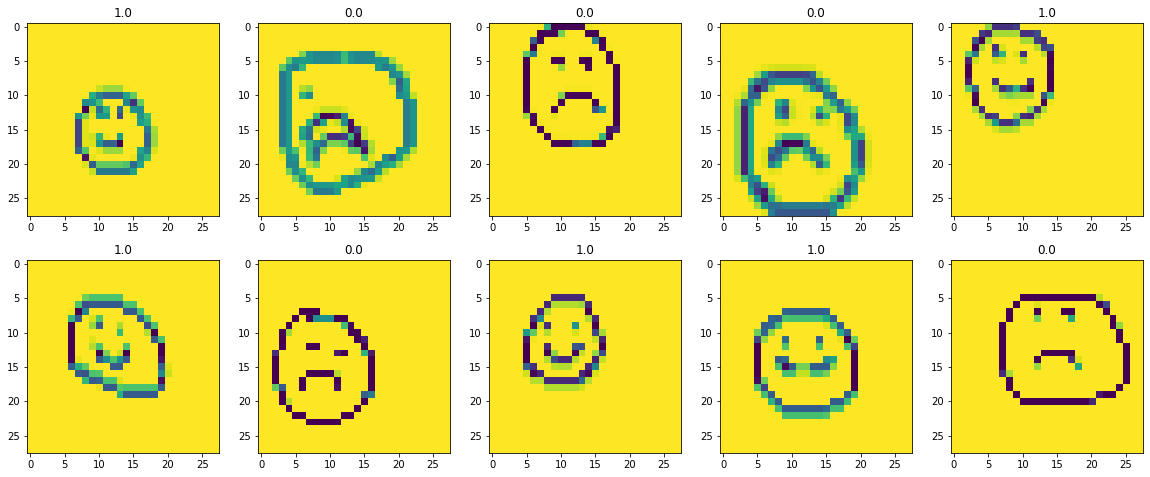

In [ ]:
plt.subplots(nrows=2, ncols=5, figsize=(20, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

imgs = X

for i in np.arange(1,11):
  plt.subplot(2,5,i)
  # Here I had to reshape the data into 28x28 matrcies in order to
  # show the correct image
  img_plot = X[i-1]
  show = plt.imshow(img_plot)
  plt.title(Y[i-1])
plt.show();

# Creating Training, Validation, and Testing Data
I will use KFold cross validation for training and hyper parameter tuning. In the first train_teset_split, I am splitting the data into the training and test set. The test set will remain untouched until after hyperparameter tuning. The training set will be split again into a training and validation set. I will test the accuracy on the validation set for building Neural Network and hyperparemter tuning.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

X, Y = np.array(X_train), np.array(y_train) # X,Y will be split again for validation and training

X_, Y_ = np.array(X_test), np.array(y_test) # X_,Y_ will be saved testing at the end

# Defining the input shape and number of classes
img_rows, img_cols = 28, 28 
num_classes = 2

# reshape data, depending on Keras backend
X = X.reshape(X.shape[0], img_rows*img_cols)
X_ = X_.reshape(X_.shape[0], img_rows*img_cols)


X.shape, X_.shape 

((64000, 784), (16000, 784))

In [ ]:
from tensorflow.keras.utils import to_categorical

# convert class vectors to binary class matrices
Y = to_categorical(Y, num_classes)
Y_ = to_categorical(Y_, num_classes)




In [ ]:
def get_score(model, X_train,X_test, Y_train,Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test,Y_test)


from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)



# Building Deep Neural Network Using Keras and Tensor Flow
First I will try a fully connected Network, and then try a convolutional Neural Network
## Installing dependincies 

In [ ]:
import keras,sklearn
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# fix random seed for tensor flow randoms also 
tf.random.set_seed(seed) 


In [ ]:
# instantiate model
model = Sequential()

# adding Dense Layer
# A Dense Layer is another way of saying "fully connected" Layer
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))

# Adding another dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# apply dropout with rate 0.5
model.add(Dropout(0.5))

# The soft max layer is often used for classifcation networks, because it returns 
# a number between 0 and 1 which is a probability (or confidence) in the prediction
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])


# Training the Fully Connected Network 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((51200, 784), (51200, 2), (12800, 784), (12800, 2))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

# training parameters
batch_size = 64
epochs = 10

# train DNN and store training info in history
# What does verbose mean? 
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1,validation_data=(X_test, y_test))


Epoch 1/10
800/800 [==============================] - 5s 5ms/step - loss: 0.6856 - accuracy: 0.5514 - val_loss: 0.6655 - val_accuracy: 0.6363
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 0.6628 - accuracy: 0.5987 - val_loss: 0.6449 - val_accuracy: 0.6267
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 0.6470 - accuracy: 0.6229 - val_loss: 0.6233 - val_accuracy: 0.6635
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 0.6306 - accuracy: 0.6435 - val_loss: 0.6650 - val_accuracy: 0.5760
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 0.6210 - accuracy: 0.6515 - val_loss: 0.5949 - val_accuracy: 0.6640
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 0.6082 - accuracy: 0.6644 - val_loss: 0.6021 - val_accuracy: 0.6577
Epoch 7/10
800/800 [==============================] - 4s 5ms/step - loss: 0.5990 - accuracy: 0.6707 - val_loss: 0.5892 - val_accuracy: 0.6707
Epoch 

400/400 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.7405
Test loss: 0.5192641615867615
Test accuracy: 0.7404687404632568


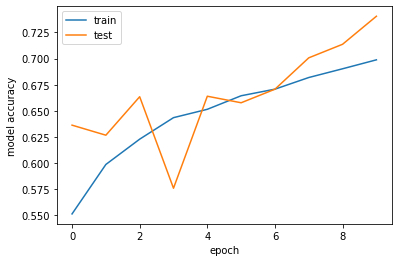

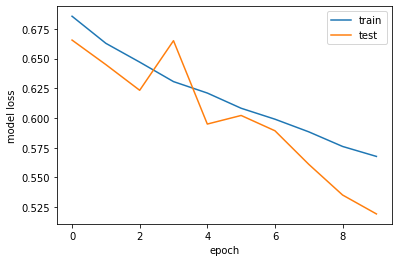

In [ ]:
# evaluate model
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show();

In [ ]:
X_test.shape

(12800, 784)

In [ ]:
y_test[:,1].shape

(12800,)

In [ ]:
preditions_table = pd.DataFrame(y_pred)
preditions_table["label"] = y_test[:,1]
predictions = preditions_table[1].map(lambda x: 1.0 if x > .5 else 0.0)
preditions_table["prediction"] = predictions
preditions_table["correct_prediction"] = preditions_table["prediction"] == preditions_table["label"]
preditions_table = preditions_table.query("correct_prediction == False")
preditions_table


0         1  label  prediction  correct_prediction
0      0.560448  0.439552    1.0         0.0               False
2      0.462256  0.537744    0.0         1.0               False
3      0.501410  0.498590    1.0         0.0               False
14     0.877652  0.122348    1.0         0.0               False
18     0.723224  0.276776    1.0         0.0               False
...         ...       ...    ...         ...                 ...
12776  0.459139  0.540861    0.0         1.0               False
12777  0.603807  0.396193    1.0         0.0               False
12786  0.524160  0.475840    1.0         0.0               False
12796  0.538372  0.461628    1.0         0.0               False
12797  0.359469  0.640531    0.0         1.0               False

[3322 rows x 5 columns]

In [ ]:
wrong_predictions_index = preditions_table.index.values
wrong_predictions_index[:10]

array([ 0,  2,  3, 14, 18, 22, 31, 32, 39, 40])

# Only 10% of the wrong predictions were sad faces predicted as happy faces. This means that model is possibly overfitting towards happy faces.

In [ ]:
preditions_table.query("label == 0").shape[0] / preditions_table.shape[0]

0.39524382901866345

# Plotting Missclassfied Images 

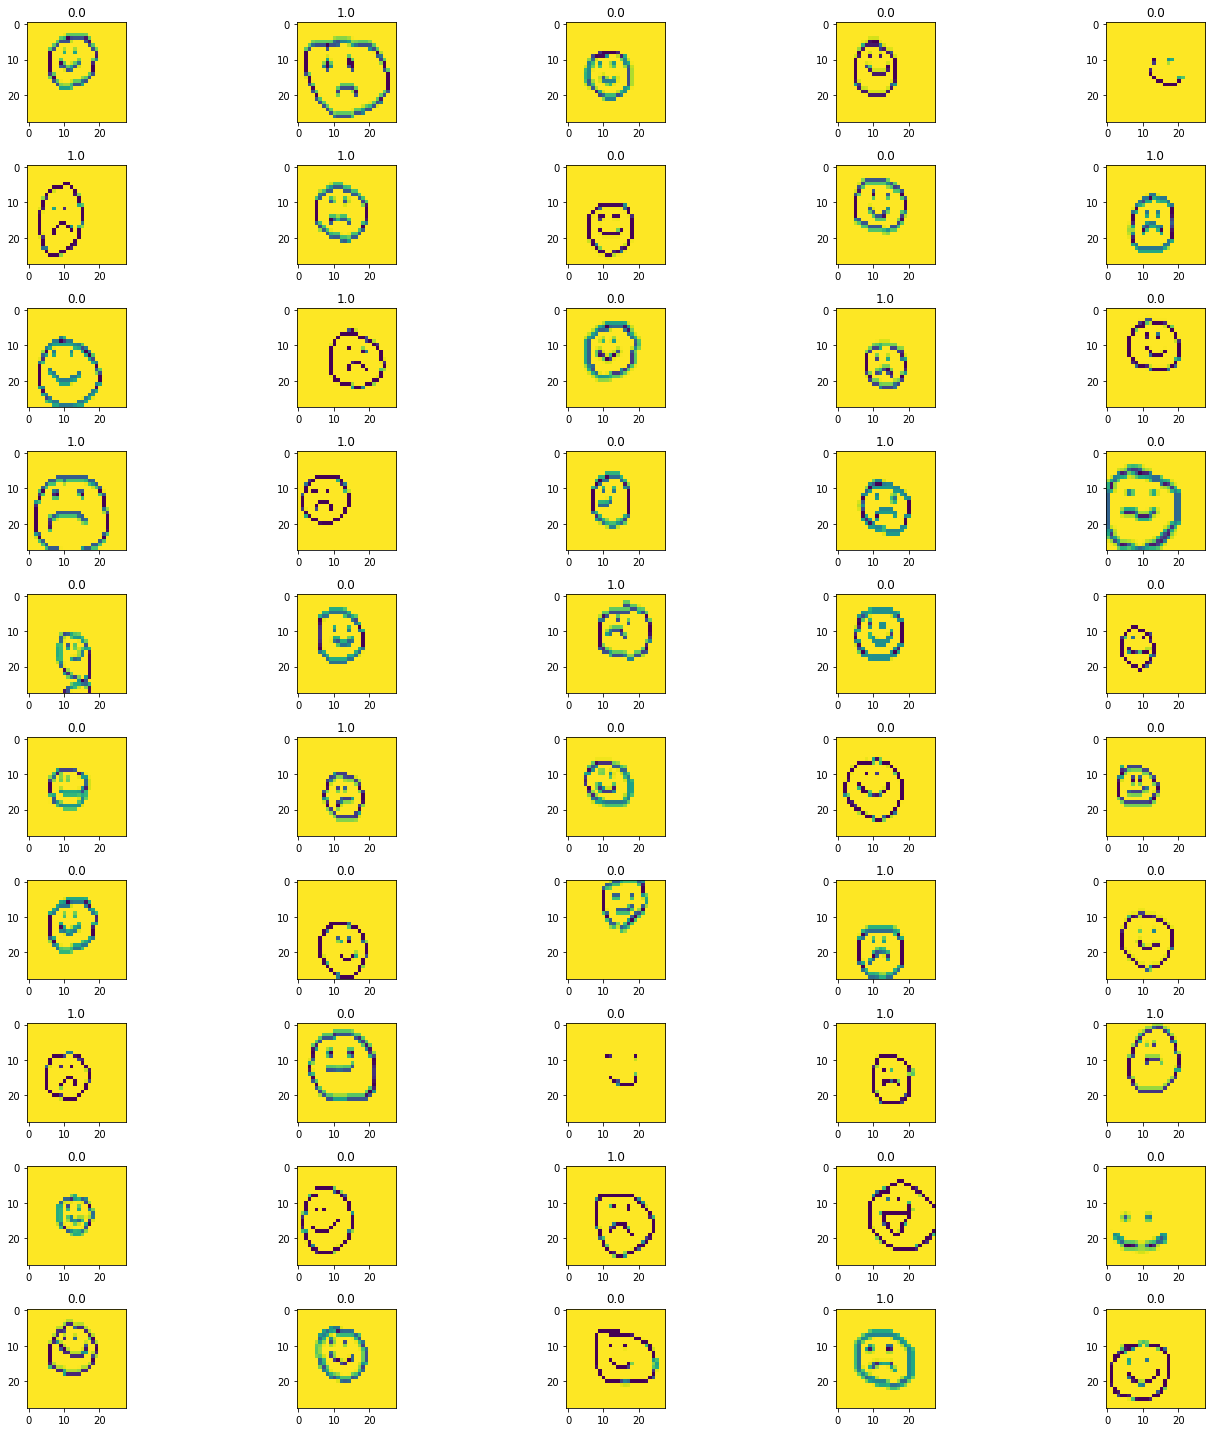

In [ ]:
plt.subplots(nrows=10, ncols=5, figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

imgs = X_test

for i, index in enumerate(wrong_predictions_index):
  if i+1 < 51:
    plt.subplot(10,5,i+1)
    # Here I had to reshape the data into 28x28 matrcies in order to
    # show the correct image
    img_plot = imgs[index].reshape(28,28)
    show = plt.imshow(img_plot)
    plt.title(preditions_table["prediction"][index])
plt.tight_layout()
plt.show();

# What is up with this strange behavior? 
I was tempted to just go and start hyperparmeter tuning, and building another model, but I remebered, we dont do that here boi. We are data centered thinkers. Go back and fix the data, add more representative samples. It is possible also that augmentation is too extreme. I went back and lessened the data augmentation.

I will go in now and add more representaitve samples, and not depend on data augmentation to acheive variation. 

I found that only 10% of the missclassified samples were sad faces predicted as happy. This means that biggest issue the model currently has is classifying happy faces as sad. I will try to overcome this by drawing more samples of both, and possibly do less variation in this next iteration of drawings. I think that the model was not able to really pickout the main difference between happy and sad faces which is the mouth. I will make very simple smiley and sad faces centered at the middle with a more obvious mouth curve.

# Switching to CNN

In [ ]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (51200, 28, 28, 1)
Y_train shape: (51200, 2)

51200 train samples
12800 test samples


In [ ]:
with open("model_data_X.pkl", "wb") as pickle_file:
  pickle.dump(X_train, pickle_file)  

with open("model_data_y.pkl", "wb") as pickle_file:
  pickle.dump(y_train, pickle_file)  




In [ ]:
model = ()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


CNN_model = Sequential()

CNN_model.add(Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# add second convolutional layer with 20 filters
CNN_model.add(Conv2D(20, (5, 5), activation='relu'))
# apply dropout with rate 0.5
CNN_model.add(Dropout(0.5))
# add 2D pooling layer
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten data
CNN_model.add(Flatten())
# add a dense all-to-all relu layer
CNN_model.add(Dense(20*4*4, activation='relu'))
# apply dropout with rate 0.5
CNN_model.add(Dropout(0.5))
# soft-max layer
CNN_model.add(Dense(num_classes, activation='softmax'))

# compile the model
CNN_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
# training parameters
batch_size = 64
epochs = 10


# train CNN
history = CNN_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

# evaliate model
score = CNN_model.evaluate(X_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
800/800 [==============================] - 30s 37ms/step - loss: 0.2901 - accuracy: 0.8457 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 2/10
800/800 [==============================] - 29s 36ms/step - loss: 0.0372 - accuracy: 0.9861 - val_loss: 0.0352 - val_accuracy: 0.9873
Epoch 3/10
800/800 [==============================] - 29s 36ms/step - loss: 0.0237 - accuracy: 0.9916 - val_loss: 0.0095 - val_accuracy: 0.9982
Epoch 4/10
800/800 [==============================] - 29s 37ms/step - loss: 0.0158 - accuracy: 0.9944 - val_loss: 0.0087 - val_accuracy: 0.9977
Epoch 5/10
800/800 [==============================] - 29s 36ms/step - loss: 0.0116 - accuracy: 0.9957 - val_loss: 0.0061 - val_accuracy: 0.9986
Epoch 6/10
800/800 [==============================] - 29s 36ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 7/10
800/800 [==============================] - 29s 36ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0041 - val_accuracy:

400/400 [==============================] - 4s 9ms/step - loss: 7.3839e-04 - accuracy: 0.9999
Test loss: 0.0007383932825177908
Test accuracy: 0.9999218583106995


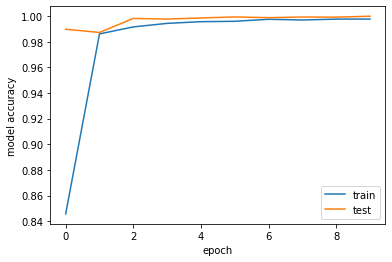

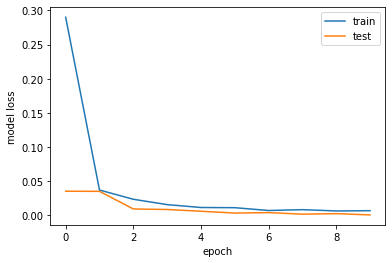

In [ ]:
# evaluate model
y_pred = CNN_model.predict(X_test)
score = CNN_model.evaluate(X_test, y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show();

# Pickle the Model and saving Data as CSV

In [ ]:
with open("CNN_Model.pkl", "wb") as pickle_file:
  pickle.dump(CNN_model, pickle_file)  


INFO:tensorflow:Assets written to: ram://b8dbbbe8-8464-4fda-8628-a951dd9132ea/assets


In [ ]:
with open("CNN_Model.pkl", "rb") as pickle_file:
  final_model = pickle.load(pickle_file)

In [ ]:
X_train.shape,X_test.shape, y_test.shape, y_test.shape

((51200, 28, 28, 1), (12800, 28, 28, 1), (12800, 2), (12800, 2))

In [ ]:
X_.shape, Y_.shape

((16000, 784), (16000, 2))

In [ ]:
X.shape, Y.shape

((64000, 784), (64000, 2))

In [ ]:
train_X_df = pd.DataFrame(X)
train_Y_df = pd.DataFrame(Y)

In [ ]:
test_X_df = pd.DataFrame(X_)
test_Y_df = pd.DataFrame(Y_)

In [ ]:
train_X_df.to_csv("X.csv")
train_Y_df.to_csv("Y.csv")

In [ ]:
test_X_df.to_csv("X_.csv")
test_Y_df.to_csv("Y_.csv")

# Build function for single input

In [ ]:
path = "/content/drive/MyDrive/img_1.png"


"""
This Function takes in a path of an image, and resizes
it to the specified IMG size

Then reshapes the image into a convolutional input value of
(1,28,28,1)

Then calls the model.predict function on this input 

The output is dictionary with two keys: Happy / Sad
and there respective probabilities (confidence) for 
the prediction

"""

def make_prediction(path, IMG_SIZE=IMG_SIZE):
  data = image_reducer(path).reshape(1, IMG_SIZE, IMG_SIZE, 1)
  prediction = CNN_model.predict(data)[0]
  return_dict = {"Sad": prediction[0], "Happy": prediction[1] }
  return return_dict

make_prediction(path)

{'Happy': 0.99999166, 'Sad': 8.338927e-06}

# Testing on Unseen Data with the test set. We have not yet tested on the X_ and Y_ data that was split off initially, we have only been testing on vaidation data. 

In [ ]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    XTEST = X_.reshape(X_.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    XTEST = X_.reshape(X_.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('XTEST shape:', XTEST.shape)
print()
print(XTEST.shape[0], 'XTEST samples')

XTEST shape: (16000, 28, 28, 1)

16000 XTEST samples


In [ ]:
# evaluate model
y_pred = CNN_model.predict(XTEST)
score = CNN_model.evaluate(XTEST, Y_, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

500/500 [==============================] - 6s 12ms/step - loss: 8.9023e-04 - accuracy: 0.9999
Test loss: 0.00089023367036134
Test accuracy: 0.999875009059906


# Nearly 100% Accuracy is acheived on the unseen test data. So this model is good to deploy and test. 

# Generative model to create smile and sad faces. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!if [ -d SIG_GIS ]; then rm -Rf SIG_GIS; fi
!git clone https://github.com/biweidai/SIG_GIS.git

Cloning into 'SIG_GIS'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 277 (delta 182), reused 205 (delta 123), pack-reused 0
Receiving objects: 100% (277/277), 3.45 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./SIG_GIS/')
from GIS import GIS
import pickle

In [ ]:
from SINF import SINF
from SIG import add_one_layer_inverse, preprocess, toimage

In [ ]:
import pandas as pd
X_train = pd.read_csv("/content/drive/MyDrive/Smiley_Data/X.csv")
X_train = pd.DataFrame(X_train).drop("Unnamed: 0", axis=1).values
X_train = torch.tensor(X_train.reshape(64000,28,28))
X_train.shape

torch.Size([64000, 28, 28])

In [ ]:
y_train = pd.read_csv("/content/drive/MyDrive/Smiley_Data/Y.csv")
y_train = pd.DataFrame(y_train).drop("Unnamed: 0", axis=1).values
y_train = torch.tensor(y_train)
y_train.shape


torch.Size([64000, 2])

In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/Smiley_Data/X_.csv")
X_test = pd.DataFrame(X_test).drop("Unnamed: 0", axis=1).values
X_test = torch.tensor(X_test.reshape(16000,28,28))
X_test.shape

torch.Size([16000, 28, 28])

In [ ]:
y_test = pd.read_csv("/content/drive/MyDrive/Smiley_Data/Y_.csv")
y_test = pd.DataFrame(y_test).drop("Unnamed: 0", axis=1).values
y_test = torch.tensor(y_test)
y_test.shape

torch.Size([16000, 2])

For the first 40 iterations use:
- K=28
- kernel=[14,14,1]
- shift=torch.randint(14, (2,)).tolist() 

For the next 30 iterations use: 
- K=14 
- kernel=[7,7,1]
- shift=torch.randint(7, (2,)).tolist()

For the final 30 iterations use: 
- K=8 
- kernel=[4,4,1] 
- shift=torch.randint(4, (2,)).tolist()



In [ ]:
data_train = preprocess(X_train)
data_test = preprocess(X_test)

sample = torch.randn(60000, 784)
sample_test = torch.randn(100, 784)

./SIG_GIS/SIG.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).float().reshape(len(data), -1)


In [ ]:
shift=torch.randint(14, (2,)).tolist() 
K=56
nsample_A=60000
nsample=60000
batchsize=10000
ndim = 784
kernel=[14,14,1]


def build_model(loops,K=K, shift=shift, kernel=kernel):
  torch.manual_seed(0)
  model = SINF(ndim=784).requires_grad_(False)
  sample = torch.randn(60000, 784)
  sample_test = torch.randn(100, 784)
  for i in range(loops):
    final_model, sample, sample_test = add_one_layer_inverse(model, data_train, sample, K, nsample_A, nsample, sample_test=sample_test, batchsize=batchsize, layer_type='patch', shape=[28,28,1], kernel=kernel, shift=shift)
    print(sample_test)
    print(sample)
  return [model, sample, sample_test] 

In [ ]:
model_0 = build_model(0)
with open("GAN_Model_0.pkl", "wb") as pickle_file:
  pickle.dump(model_0, pickle_file)  

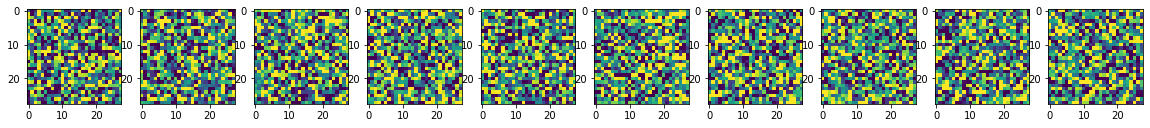

In [ ]:
plt.subplots(nrows=1, ncols=10, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

i = 1
for img in toimage(model_0[2], shape=[28,28])[0:10]:
  plt.subplot(1,10,i)
  plt.imshow(img)
  i += 1 

In [ ]:
model_20 = build_model(20)
with open("GAN_Model_20.pkl", "wb") as pickle_file:
  pickle.dump(model_20, pickle_file)  

./SIG_GIS/SINF.py:716: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_H = (self.shape[0] // self.kernel[0]).item()
./SIG_GIS/SINF.py:717: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_W = (self.shape[1] // self.kernel[1]).item()
./SIG_GIS/SINF.py:718: UserWarning: __floordiv__ is deprecated, and its behavior w

Fit A: Time: 102.6234921875 Wasserstein Distance: [[4.163244247436523, 4.050826072692871, 3.6663818359375, 3.6494829654693604, 3.5291833877563477, 3.3954286575317383, 3.173456907272339, 2.800161838531494, 2.7961738109588623, 2.7112350463867188, 2.695422887802124, 2.6519880294799805, 2.545109987258911, 2.397461175918579, 2.3125360012054443, 2.304839611053467, 2.2761781215667725, 2.2126519680023193, 2.177504777908325, 2.149027109146118, 2.125743865966797, 2.104466676712036, 2.0171380043029785, 1.9785900115966797, 1.8246833086013794, 1.8159096240997314, 1.7340493202209473, 1.611345887184143, 1.6073118448257446, 1.5712604522705078, 1.5490386486053467, 1.5059559345245361, 1.4933968782424927, 1.4855034351348877, 1.4652011394500732, 1.4475550651550293, 1.4165712594985962, 1.3723719120025635, 1.3471394777297974, 1.3292957544326782, 1.300182580947876, 1.2719380855560303, 1.1794406175613403, 1.1632071733474731, 1.1102551221847534, 1.0977321863174438, 1.0742961168289185, 1.0337169170379639, 1.031

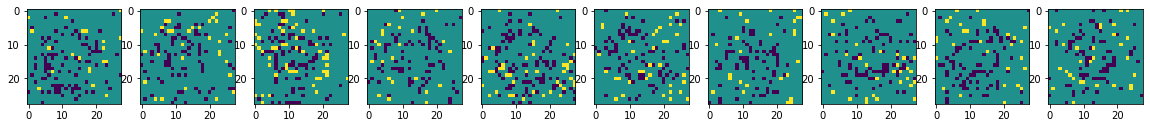

In [ ]:
plt.subplots(nrows=1, ncols=10, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

i = 1
for img in toimage(model_20[2], shape=[28,28])[0:10]:
  plt.subplot(1,10,i)
  plt.imshow(img)
  i += 1 

In [ ]:
model_40 = build_model(40)
with open("GAN_Model_40.pkl", "wb") as pickle_file:
  pickle.dump(model_40, pickle_file)  

./SIG_GIS/SINF.py:716: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_H = (self.shape[0] // self.kernel[0]).item()
./SIG_GIS/SINF.py:717: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_W = (self.shape[1] // self.kernel[1]).item()
./SIG_GIS/SINF.py:718: UserWarning: __floordiv__ is deprecated, and its behavior w

Fit A: Time: 95.1378671875 Wasserstein Distance: [[4.163244247436523, 4.050826072692871, 3.6663818359375, 3.6494829654693604, 3.5291833877563477, 3.3954286575317383, 3.173456907272339, 2.800161838531494, 2.7961738109588623, 2.7112350463867188, 2.695422887802124, 2.6519880294799805, 2.545109987258911, 2.397461175918579, 2.3125360012054443, 2.304839611053467, 2.2761781215667725, 2.2126519680023193, 2.177504777908325, 2.149027109146118, 2.125743865966797, 2.104466676712036, 2.0171380043029785, 1.9785900115966797, 1.8246833086013794, 1.8159096240997314, 1.7340493202209473, 1.611345887184143, 1.6073118448257446, 1.5712604522705078, 1.5490386486053467, 1.5059559345245361, 1.4933968782424927, 1.4855034351348877, 1.4652011394500732, 1.4475550651550293, 1.4165712594985962, 1.3723719120025635, 1.3471394777297974, 1.3292957544326782, 1.300182580947876, 1.2719380855560303, 1.1794406175613403, 1.1632071733474731, 1.1102551221847534, 1.0977321863174438, 1.0742961168289185, 1.0337169170379639, 1.0319

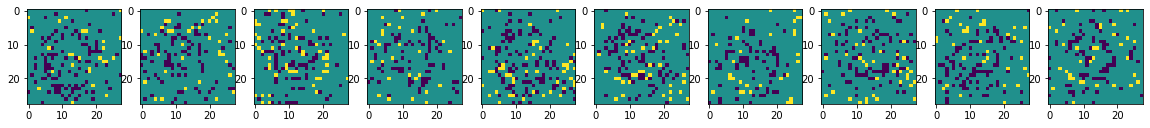

In [ ]:
plt.subplots(nrows=1, ncols=10, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

i = 1
for img in toimage(model_40[2], shape=[28,28])[0:10]:
  plt.subplot(1,10,i)
  plt.imshow(img)
  i += 1 

In [ ]:
model_80 = build_model(80)
with open("GAN_Model_80.pkl", "wb") as pickle_file:
  pickle.dump(model_80, pickle_file)  

./SIG_GIS/SINF.py:716: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_H = (self.shape[0] // self.kernel[0]).item()
./SIG_GIS/SINF.py:717: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_W = (self.shape[1] // self.kernel[1]).item()
./SIG_GIS/SINF.py:718: UserWarning: __floordiv__ is deprecated, and its behavior w

Fit A: Time: 94.6720390625 Wasserstein Distance: [[4.163244247436523, 4.050826072692871, 3.6663818359375, 3.6494829654693604, 3.5291833877563477, 3.3954286575317383, 3.173456907272339, 2.800161838531494, 2.7961738109588623, 2.7112350463867188, 2.695422887802124, 2.6519880294799805, 2.545109987258911, 2.397461175918579, 2.3125360012054443, 2.304839611053467, 2.2761781215667725, 2.2126519680023193, 2.177504777908325, 2.149027109146118, 2.125743865966797, 2.104466676712036, 2.0171380043029785, 1.9785900115966797, 1.8246833086013794, 1.8159096240997314, 1.7340493202209473, 1.611345887184143, 1.6073118448257446, 1.5712604522705078, 1.5490386486053467, 1.5059559345245361, 1.4933968782424927, 1.4855034351348877, 1.4652011394500732, 1.4475550651550293, 1.4165712594985962, 1.3723719120025635, 1.3471394777297974, 1.3292957544326782, 1.300182580947876, 1.2719380855560303, 1.1794406175613403, 1.1632071733474731, 1.1102551221847534, 1.0977321863174438, 1.0742961168289185, 1.0337169170379639, 1.0319

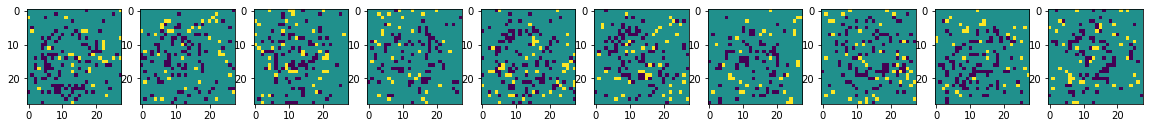

In [ ]:
plt.subplots(nrows=1, ncols=10, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

i = 1
for img in toimage(model_80[2], shape=[28,28])[0:10]:
  plt.subplot(1,10,i)
  plt.imshow(img)
  i += 1 

In [ ]:
model_80 = build_model(80)
with open("GAN_Model_80.pkl", "wb") as pickle_file:
  pickle.dump(model_80, pickle_file)  

./SIG_GIS/SINF.py:716: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_H = (self.shape[0] // self.kernel[0]).item()
./SIG_GIS/SINF.py:717: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_W = (self.shape[1] // self.kernel[1]).item()
./SIG_GIS/SINF.py:718: UserWarning: __floordiv__ is deprecated, and its behavior w

Fit A: Time: 95.151421875 Wasserstein Distance: [[4.163244247436523, 4.050826072692871, 3.6663818359375, 3.6494829654693604, 3.5291833877563477, 3.3954286575317383, 3.173456907272339, 2.800161838531494, 2.7961738109588623, 2.7112350463867188, 2.695422887802124, 2.6519880294799805, 2.545109987258911, 2.397461175918579, 2.3125360012054443, 2.304839611053467, 2.2761781215667725, 2.2126519680023193, 2.177504777908325, 2.149027109146118, 2.125743865966797, 2.104466676712036, 2.0171380043029785, 1.9785900115966797, 1.8246833086013794, 1.8159096240997314, 1.7340493202209473, 1.611345887184143, 1.6073118448257446, 1.5712604522705078, 1.5490386486053467, 1.5059559345245361, 1.4933968782424927, 1.4855034351348877, 1.4652011394500732, 1.4475550651550293, 1.4165712594985962, 1.3723719120025635, 1.3471394777297974, 1.3292957544326782, 1.300182580947876, 1.2719380855560303, 1.1794406175613403, 1.1632071733474731, 1.1102551221847534, 1.0977321863174438, 1.0742961168289185, 1.0337169170379639, 1.03192

In [ ]:
torch.manual_seed(0)
model = SINF(ndim=784).requires_grad_(False)
sample = torch.randn(60000, 784)
sample_test = torch.randn(100, 784)

K=56
nsample_A=60000
nsample=60000
batchsize=10000
ndim = 784
for i in range(200):
  # if i == 0:
  K=28
  kernel=[14,14,1]
  shift=torch.randint(14, (2,)).tolist() 
  final_model, sample, sample_test = add_one_layer_inverse(model, data_train, sample, K, nsample_A, nsample, sample_test=sample_test, batchsize=batchsize, layer_type='patch', shape=[28,28,1], kernel=kernel, shift=shift)


for i in range(100):
  K=14 
  kernel=[7,7,1]
  shift=torch.randint(7, (2,)).tolist()
  final_model, sample, sample_test = add_one_layer_inverse(model, data_train, sample, K, nsample_A, nsample, sample_test=sample_test, batchsize=batchsize, layer_type='patch', shape=[28,28,1], kernel=kernel, shift=shift)


for i in range(100):
  K=8 
  kernel=[4,4,1] 
  shift=torch.randint(4, (2,)).tolist()
  final_model, sample, sample_test = add_one_layer_inverse(model, data_train, sample, K, nsample_A, nsample, sample_test=sample_test, batchsize=batchsize, layer_type='patch', shape=[28,28,1], kernel=kernel, shift=shift)


with open("GAN_Model_150.pkl", "wb") as pickle_file:
  pickle.dump(final_model, pickle_file)  

./SIG_GIS/SINF.py:716: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_H = (self.shape[0] // self.kernel[0]).item()
./SIG_GIS/SINF.py:717: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_W = (self.shape[1] // self.kernel[1]).item()
./SIG_GIS/SINF.py:718: UserWarning: __floordiv__ is deprecated, and its behavior w

Fit A: Time: 50.01736328125 Wasserstein Distance: [[6.017847061157227, 5.841091156005859, 4.803953170776367, 4.134934425354004, 3.7960970401763916, 3.5530812740325928, 3.3349897861480713, 3.2261147499084473, 2.8490686416625977, 2.70806622505188, 2.6286137104034424, 2.3894097805023193, 2.034816265106201, 1.9427536725997925, 1.8177119493484497, 1.6792603731155396, 1.6747806072235107, 1.5400056838989258, 1.4772381782531738, 1.3101518154144287, 1.307346224784851, 1.2787864208221436, 1.1220256090164185, 1.067081332206726, 1.0591695308685303, 1.0326719284057617, 1.0132838487625122, 1.0054618120193481], [5.500613212585449, 5.391469478607178, 4.407517433166504, 4.39957857131958, 3.4645726680755615, 3.3487699031829834, 3.294065237045288, 3.1537387371063232, 3.0353918075561523, 3.014645576477051, 2.657203435897827, 2.654510736465454, 2.5774381160736084, 2.3914365768432617, 2.3714630603790283, 2.095987558364868, 2.0020806789398193, 1.7420876026153564, 1.5679268836975098, 1.5211657285690308, 1.417

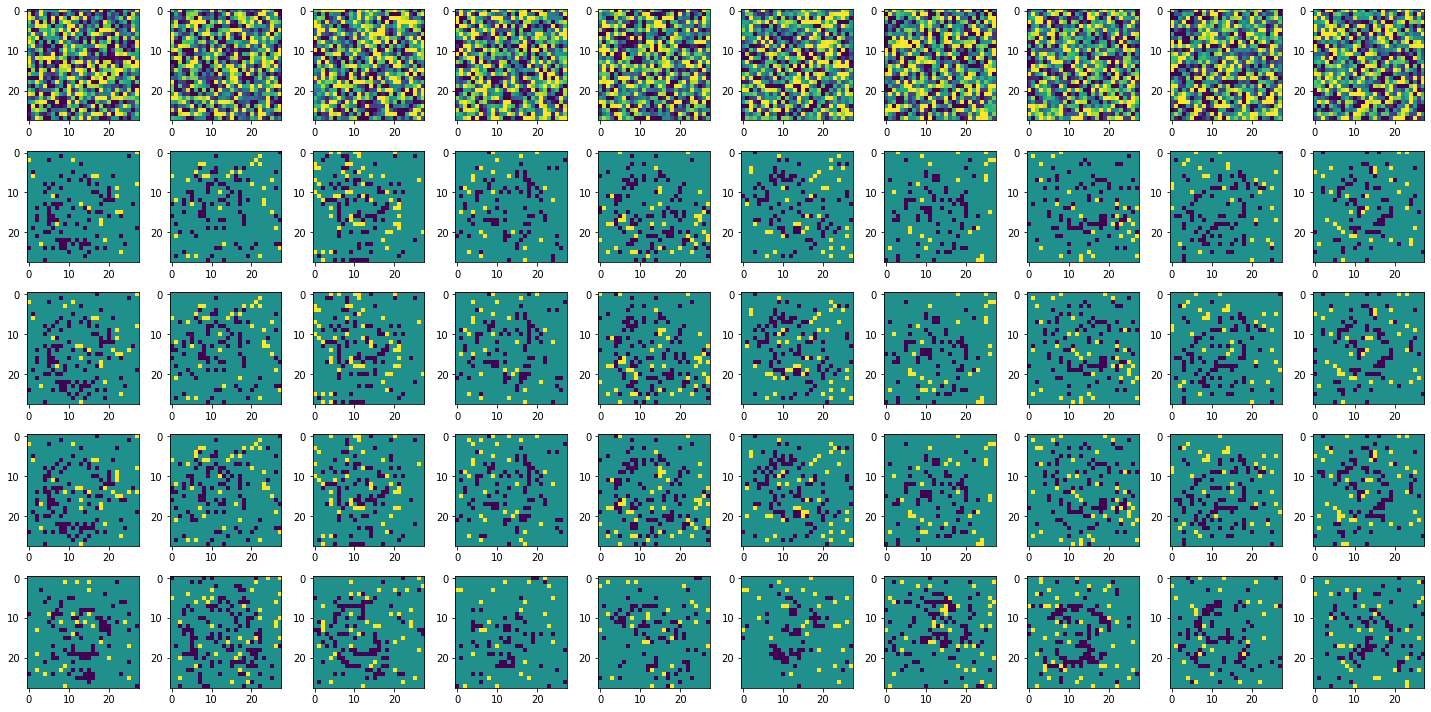

In [ ]:
trained_models = [model_0, model_20, model_40, model_80, sample_test]

plt.subplots(nrows=len(trained_models), ncols=10, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

sample_test_image_0 = toimage(model_0[2], shape=[28,28])[0:10]
sample_test_image_20 = toimage(model_20[2], shape=[28,28])[0:10]
sample_test_image_40 = toimage(model_40[2], shape=[28,28])[0:10]
sample_test_image_80 = toimage(model_80[2], shape=[28,28])[0:10]
sample_test_image_150 = toimage(sample_test, shape=[28,28])[0:10]

stack = np.vstack((sample_test_image_0,
                   sample_test_image_20, 
                   sample_test_image_40, 
                   sample_test_image_80,
                   sample_test_image_150))

i = 1
for img in stack:
  plt.subplot(5,10,i)
  plt.imshow(img)
  i += 1

plt.tight_layout()